<a href="https://colab.research.google.com/github/ValentinoFilipetto/Thesis/blob/main/BR_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Direct product construction

Example: two graphs and drawings. We work on directed labelled  multigraphs. 


[('1*', 2, {'label': 'R'}), ('1*', '4*', {'label': 'W'}), ('1*', '5*', {'label': 'W'}), (3, '1*', {'label': 'S'})]


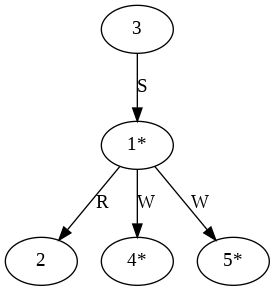

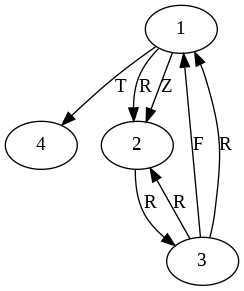

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image, display

G1=nx.MultiDiGraph ()

#G1.add_node()

G1.add_edge('1*',2,label='R') # Where 'i*' means that vertice i is a distinguished element of the graph. 
G1.add_edge(3,'1*',label='S')
G1.add_edge('1*','4*',label='W')
G1.add_edge('1*','5*',label='W')
#new_edge = [(5,1,label='S')]

#G1.add_edges_from(new_edge)

#node_label = nx.get_node_attributes(G1,'id')
pos = nx.spring_layout(G1)
#node_label = nx.get_node_attributes(G1,'id')
pos = nx.spring_layout(G1)
p=nx.drawing.nx_pydot.to_pydot(G1)
p.write_png('G1.png')
Image(filename='G1.png')

print(G1.edges(data=True))

#####################################################################

G2=nx.MultiDiGraph ()

G2.add_node(4)

G2.add_edge(1,2,label='R')
G2.add_edge(1,4,label='T')
G2.add_edge(1,2,label='Z')
G2.add_edge(3,1,label='F')
G2.add_edge(3,2,label='R')
G2.add_edge(2,3,label='R')
G2.add_edge(3,1,label='R')

#for edge in G2.edges(data=True): edge[2]['label'] = edge[2]['weight']
node_label = nx.get_node_attributes(G2,'id')
pos = nx.spring_layout(G2)
node_label = nx.get_node_attributes(G2,'id')
pos = nx.spring_layout(G2)
g=nx.drawing.nx_pydot.to_pydot(G2)
g.write_png('G2.png')
Image(filename='G2.png')

listOfImageNames = ['G1.png',
                    'G2.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))






Cartesian product of the sets of nodes of two graphs G and H.


In [2]:
from itertools import product # Importing the cartesian product of two sets

#print(list(product(G_1,G_2))) # Example

# These two functions give us the set of nodes of the new graph

def _dict_product(d1, d2):
    return {k: (d1.get(k), d2.get(k)) for k in set(d1) | set(d2)}

def _node_product(G,H):
    for u, v in product(G, H):
      yield ((u, v), _dict_product(G.nodes[u], H.nodes[v]))

print(list(_node_product(G1,G1)))

[(('1*', '1*'), {}), (('1*', 2), {}), (('1*', 3), {}), (('1*', '4*'), {}), (('1*', '5*'), {}), ((2, '1*'), {}), ((2, 2), {}), ((2, 3), {}), ((2, '4*'), {}), ((2, '5*'), {}), ((3, '1*'), {}), ((3, 2), {}), ((3, 3), {}), ((3, '4*'), {}), ((3, '5*'), {}), (('4*', '1*'), {}), (('4*', 2), {}), (('4*', 3), {}), (('4*', '4*'), {}), (('4*', '5*'), {}), (('5*', '1*'), {}), (('5*', 2), {}), (('5*', 3), {}), (('5*', '4*'), {}), (('5*', '5*'), {})]


Example to check that everything works:



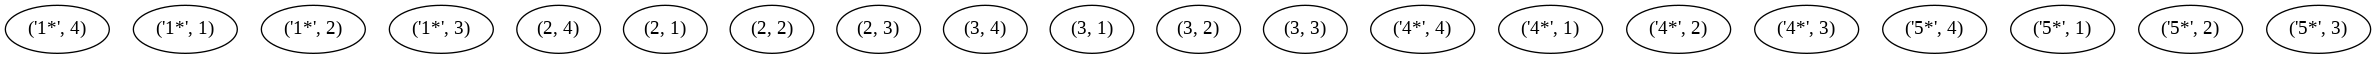

In [3]:
GH = nx.MultiDiGraph ()

GH.add_nodes_from(_node_product(G1,G2))
m=nx.drawing.nx_pydot.to_pydot(GH)
m.write_png('GH.png')
Image(filename='GH.png')

listOfImageNames = ['GH.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

New edges of the direct product of two graphs G and H.

In [4]:
def edge_product(G,H,GH):
  for (uG,vG,lG) in G.edges(data=True):
    for (uH,vH,lH) in H.edges(data=True):
     if list(lG.values()) == list(lH.values()):
       GH.add_edge((uG,uH),(vG,vH),label=list(lG.values())[0])
       



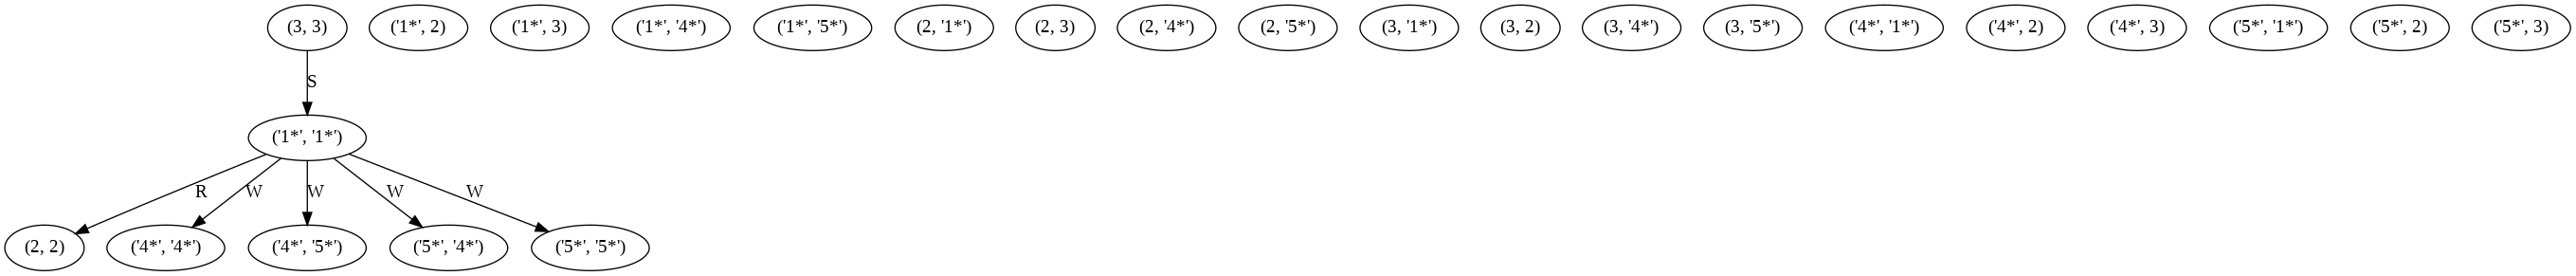

In [5]:
G3 = nx.MultiDiGraph ()

G3.add_nodes_from(_node_product(G1,G1))

edge_product(G1,G1,G3)

node_label = nx.get_node_attributes(G3,'id')
pos = nx.spring_layout(G3)
p=nx.drawing.nx_pydot.to_pydot(G3)
p.write_png('G3.png')
Image(filename='G3.png')

listOfImageNames = ['G3.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))



# The algorithm: 'brute force' version

We now implement the algorithm. In the following two sections we present the **safety** check, i.e. we check that every pair of distinguished elements in our construction appears in the product at least once.

In [6]:
def collect_star(G):
 product = []
 for node in list(G.nodes):
   if isinstance(node, str) and node[1] == '*':
     product.append(node)
 return product 

print(collect_star(G1))

# La funzione sopra probabilmente non serve. Semplicemente scrivi i distinguished
# elements come una lista e cambia i nodi nel grafo aggiungendo un asterisco se
# sono distinguished, sulla base della lista. 

def product_dist(G1,G2):
  return list(zip(collect_star(G1), collect_star(G2)))

print(product_dist(G1,G1))


['1*', '4*', '5*']
[('1*', '1*'), ('4*', '4*'), ('5*', '5*')]


In [7]:
def normalization(l):
  outcome = []
  for (x,y,z) in l:
   outcome.append((x))
   outcome.append((y))
  return outcome

def safety(G1,G2,G3):
  my_list = []
  for e in product_dist(G1,G1):
      if e in normalization(G3.edges):
       my_list.append('1')
      else:
       my_list.append('0')
  return my_list

def safety_check(G1,G2,G3):
  if '0' in safety(G1,G2,G3):
    print('G3 is not safe.')
  else:
    print('G3 is safe.')

safety(G1,G1,G3)
safety_check(G1,G2,G3)

print(list(G3.nodes))

G3 is safe.
[('1*', '1*'), ('1*', 2), ('1*', 3), ('1*', '4*'), ('1*', '5*'), (2, '1*'), (2, 2), (2, 3), (2, '4*'), (2, '5*'), (3, '1*'), (3, 2), (3, 3), (3, '4*'), (3, '5*'), ('4*', '1*'), ('4*', 2), ('4*', 3), ('4*', '4*'), ('4*', '5*'), ('5*', '1*'), ('5*', 2), ('5*', 3), ('5*', '4*'), ('5*', '5*')]


We now implement the **homomorphism** part: we check whether or not there is an homomorphism between the direct product and each one of the negative examples. 

In [ ]:
# Non è facile. Per esempio non capisco se devo provare tutte le combinazioni di ordini di edges; finora non ho trovato 
# nessun esempio che mi obblighi a farlo, ma ho una scarsa intuizione sul problema. 

# The algorithm: polynomial-time version


We now implement the polynomial time version of the previous algorithm. Since we look at the desyncronized k-consistency, no safeness condition is required, as each pair of the form $(\mathcal{D},\overline{a})$, for $\overline{a} \in S^+$, is safe by definition. 


We first implement a preliminary version of the k-consistency test, i.e. the so-called *arc-consistency test.*

In [80]:
def list_of_nodes(G,H):
  my_dic = {}
  for node in G.nodes:
    my_dic.update({node:list(G.nodes)})
  
  return my_dic

def arc_consistency(G,H):
  list_of_nodes(G,H)
  change = True
  while change == True:
    for (x_1,y_1,z_1) in G.edges:
      for (x_2,y_2,z_2) in H.edges:
        if (x_2,y_2,z_2) and y_2 not in list_of_nodes(G,H).get(y_1):
          l =  list_of_nodes(G,H).get(y_1)
          l.remove(x_2)
          change == True 
        if (x_2,y_2,z_2) and y_2 not in list_of_nodes(G,H).get(y_1):
          l =  list_of_nodes(G,H).get(y_1)
          l.remove(x_2)
          change == True 
        else:
          change == False 
      

  
 

print(list_of_nodes(G1,G1))

#print(arc_consistency(G1,G1))

{'1*': ['1*', 2, 3, '4*', '5*'], 2: ['1*', 2, 3, '4*', '5*'], 3: ['1*', 2, 3, '4*', '5*'], '4*': ['1*', 2, 3, '4*', '5*'], '5*': ['1*', 2, 3, '4*', '5*']}


In [78]:
print(list_of_nodes(G1,G1).get('1*'))

l = list_of_nodes(G1,G1).get('1*')

list_of_nodes(G1,G1).get('1*').remove(2)

l.remove(2)

print(l)



print([1,2])

[1,2].remove(1)

print(my_list)



['1*', 2, 3, '4*', '5*']
['1*', 3, '4*', '5*']
[1, 2]
[2]
